# Logistic Regression with Neural Network mindset

Building **Logistic Regression Classifier** to recognize birds.

**Problem Statement.**
From Cifar-10 dataset we will take images with birds and non-birds.
We will mark birds with label 1 (y=1) and others with 0 (y=0).
We will divide dataset for training subset and testing subset.
Finally, we will build Simple Image-Recognition Algorithm for classification pictures as birds or non-birds.
Using Cifar-10 dataset.
No "for" loops used.

**General algorithm** is as following:
- Initializing parameters
- Calculating Cost Function and its Gradient
- Using an optimizational algorithm for updating parameters (Gradient Descent)

**Mathematical model of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

Then **Cost Function** is computed by summing over all training examples. Cost Function is **negative log-likelihood function**:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$

Then **Gradient** of Cost Function is computed:
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{6}$$

Finally, **Updating** of the parameters is implemented:
$$ w = w - \alpha \text{ } dw,\tag{7}$$
$$ b = b - \alpha \text{ } db,\tag{8}$$
where $\alpha$ is the learning rate.

**General Architecture of the learning algorithm is as following:**

<img src="images/Architecture_of_Logistic_Regression_Algorithm.png">

## Importing needed libraries

In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize

## Loading data from CIFAR-10 dataset

1032

(1032, 32, 32, 3)
(1032,)

(1032, 32, 32, 3)
(1032,)

(2064, 32, 32, 3)
(2064,)

(1900, 32, 32, 3)
(1900,)
(164, 32, 32, 3)
(164,)


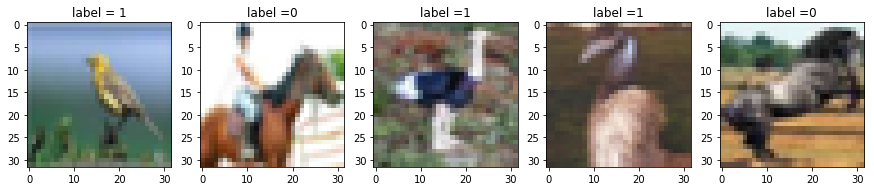

In [16]:
# Creating function for loading single batch of CIFAR-10 dataset
def single_batch_cifar10(file):
    # Opening file for reading in binary mode
    with open(file, 'rb') as f_single_batch:
        d_single_batch = pickle.load(f_single_batch, encoding='latin1')  # dictionary type, we use 'latin1' for python3
        x = d_single_batch['data']  # numpy.ndarray type, (10000, 3072)
        y = d_single_batch['labels']  # list type
        """Initially every batch's dictionary with key 'data' has shape (10000, 3072)
        Where, 10000 - number of image samples
        3072 - three channels of image (red + green + blue)
        Every row contains an image 32x32 pixels with its three channels"""
        
        # Here we reshape and transpose ndarray for further use
        # Firstly, we need to divide line (3072) for 3 channels
        # Then, we divide each channel for 32 by 32 matrixes
        # Finally, we use transpose to put channels at the end in order to be able to show images
        x = x.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)  # (10000, 32, 32, 3)
        # Making numpy array from list of labels
        y = np.array(y)

        # Returning ready data
        return x, y


# Preparing labels for each class
# CIFAR-10 has 10 classes from 0 to 9
labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Loading data from file
x, y = single_batch_cifar10('datasets/data_batch_1')

# Preparing list for storing indexes of birds and non-birds from dataset
indexes_for_birds = []
indexes_for_non_birds = []
# Going through loaded dataset and picking up needed indexes
for i in range(10000):
    if y[i] == 2:
        indexes_for_birds += [i]
    else:
        indexes_for_non_birds += [i]

# Checking how many images with birds we got
m_birds = len(indexes_for_birds)  # 1032
print(m_birds)
print()

# Getting from data only images with birds as we will work with one type only
batch_mask = indexes_for_birds
x_birds = x[batch_mask]
y_birds = np.ones((m_birds))
print(x_birds.shape, y_birds.shape, sep='\n')  # (1032, 32, 32, 3)  (1032,)
print()

# Getting from data images with non-birds
batch_mask = indexes_for_non_birds[:m_birds]  # Slicing to make amout of images with non-birds the same with birds
x_non_birds = x[batch_mask]
y_non_birds = np.zeros((m_birds))
print(x_non_birds.shape, y_non_birds.shape, sep='\n')  # (1032, 32, 32, 3)  (1032,)
print()

# Stacking data with birds and non-birds together
x = np.vstack((x_birds, x_non_birds))
y = np.hstack((y_birds, y_non_birds))
print(x.shape, y.shape, sep='\n')  # (2064, 32, 32, 3)  (2064,)
print()

# Shuffle data
# Multi-dimensional arrays are only shuffled along the first axis
# By using seed we generate two times the same random numbers and save appropriate connection: image --> label
np.random.seed(0)
np.random.shuffle(x)
np.random.seed(0)
np.random.shuffle(y)

# Preparing data for training and testing
# Data for training is taken with first 1900 examples
batch_mask = list(range(1900))  # [0 .. 1899]
x_train = x[batch_mask]  # (1900, 32, 32, 3)
y_train = y[batch_mask]  # (1900,)
# Data for testing is taken with last 100 examples
batch_mask = list(range(1900, 2064))  # [932 .. 1031]
x_test = x[batch_mask]  # (164, 32, 32, 3)
y_test = y[batch_mask]  # (164,)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, sep='\n')

# Plotting 5 examples of images and checking labels
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 15) # Setting default size of plots
# Preparing figures for plotting
figure_1, ax = plt.subplots(nrows=1, ncols=5)
# 'ax 'is as (3,) np array and we can call each time ax[0]
ax[0].imshow(x_train[0])
ax[0].set_title('label = ' + str(int(y_train[0])))
ax[1].imshow(x_train[20])
ax[1].set_title('label =' + str(int(y_train[20])))
ax[2].imshow(x_train[300])
ax[2].set_title('label =' + str(int(y_train[300])))
ax[3].imshow(x_train[1000])
ax[3].set_title('label =' + str(int(y_train[1000])))
ax[4].imshow(x_train[1500])
ax[4].set_title('label =' + str(int(y_train[1500])))
plt.show()



# Flatten prepared datsets

For convenience we will reshape images of shape (32, 32, 3) into numpy array of shape (3072, 1).

By using '-1' we say that number of column is unknown, but number of rows is known.

By using '.T' we're transposing each image and making their data arranged in columns. 

In [3]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1).T
y_train_columns = y_train.reshape(1, y_train.shape[0])
x_test_flatten = x_test.reshape(x_test.shape[0], -1).T
y_test_columns = y_test.reshape(1, y_test.shape[0])

print(x_train_flatten.shape)
print(y_train_columns.shape)
print(x_test_flatten.shape)
print(y_test_columns.shape)

(3072, 1900)
(1, 1900)
(3072, 164)
(1, 164)


# Preprocessing dataset

Normalizing whole data by dividing /255.0

In [4]:
x_train_processed = x_train_flatten / 255.0
x_test_processed = x_test_flatten / 255.0

# Creating Helper Functions

1. Implementing **sigmoid()** function by using following equation:
$$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$
2. Implementing **initialize_with_zeros(dim)** function for parameters initialization.
3. Implementing **propagate(w, b, x, y)** function for "forward" and "backward" propagation steps for learning the parameters. Function computes the Cost Function and its Gradient. Algorithm for Forward and Backward Propagation:
$$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$$
$$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$$
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$
4. Implementing **optimize(w, b, x, y, number_of_iterations, learning_rate, print_cost = False)** function for updating the parameters using Gradient Descent. Goal is to learn $w$ and $b$ by minimizing the Cost Function $J$. For a parameter $w$, the update rule is as following:
$$ w = w - \alpha \text{ } dw,$$
where $\alpha$ is the learning rate.
5. Implementing **predict(w, b, x)** function for predicting. Algorithm is as following:
$$\hat{Y} = A = \sigma(w^T X + b)$$
Output converted into 0 (if activation <= 0.5) or 1 (if activation > 0.5).

In [5]:
# Function to calculate sigmoid
# Function computes sigmoid of input
# Input is a scalar or numpy array of any size
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [6]:
# Function for parameters initilization
# Initializing weights as zero vector with shape (dim, 1) and bias as 0
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

In [7]:
# Function for "forward" and "backward" propagation steps
# Computes the Cost Function and its Gradient
def propagate(w, b, x, y):
    # Number of input images
    m = x.shape[1]
    # Computing Activation
    A = sigmoid(np.dot(w.T, x) + b)
    # Computing Cost Function
    cost = (-1 / m) * (np.dot(y, np.log(A).T) + np.dot((1 - y), np.log(1 - A).T))
    cost = np.squeeze(cost)  # Deleting all 1-dimensions from array
    # Computing Gradient
    dw = (1 / m) * np.dot(x, (A - y).T)
    db = (1 / m) * np.sum(A - y)
    grad = {'dw': dw, 'db': db}
    
    return grad, cost

In [8]:
# Function for updating parameters
# Implementation of optimizing w and b by running Gradient Descent Algorithm
# Function returns:
# params - dictionary with weights and bias
# grads - dictionary with gradient of weights and bias
# cost_history - history with list of all costs computed during optimization
def optimize(w, b, x, y, number_of_iterations, learning_rate, print_cost = False):
    # Preparing list for storing history of computed cost
    cost_history = []
    
    # Iterating and optimizing parameters
    for i in range(number_of_iterations):
        # Computing cost and gradient
        grad, cost = propagate(w, b, x, y)
        # Retrieving derivatives
        dw = grad['dw']
        db = grad['db']
        
        # Updating parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Recording cost into the history every 100 iterations
        if i % 100 == 0:
            cost_history.append(cost)
            
        # Printing cost every 100 iterations
        if print_cost and i % 100 == 0:
            print('Cost after {0}: {1}'.format(i, cost))
    
    # Saving updated parameters and gradient
    params = {'w': w, 'b': b}
    grad = {'dw': dw, 'db': db}
            
    return params, grad, cost_history

In [9]:
# Function for predicting
# Computing prediction scores and converting them
# into 0 if activation is less or equal to 0.5 
# into 1 if activation is more than 0.5# Function returns:
# Function returns:
# y_prediction - numpy array (vector) containing all predictions for input images
def predict(w, b, x):
    # Retrieving number of input images
    m = x.shape[1]
    # Preparing zero valued vector for results
    y_prediction = np.zeros((1, m))
    # Reshaping weights giving to it one more dimension
    w = w.reshape(x.shape[0], 1)
    
    # Computing vector A with probabilities
    A = sigmoid(np.dot(w.T, x) + b)
    
    # Converting probabilities to 1 or 0
    for i in range(A.shape[1]):
        if A[0, i] >= 0.5:
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0
    
    return y_prediction

# Creating Model

Model collects together all helper functions and implements learning procedure.

In [10]:
# Function for model
# Merging all helper functions into the model
# Function returns:
# d - dictionary with information about the model
def model(x_train_processed, y_train_columns, x_test_processed, y_test_columns, number_of_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # Initializing parameters with 0
    w, b = initialize_with_zeros(x_train_processed.shape[0])
    
    # Optimization with Gradient Descent
    params, grad, cost_history = optimize(w, b, x_train_processed, y_train_columns, number_of_iterations, learning_rate, print_cost)
    
    # Retrieving updated parameters
    w = params['w']
    b = params['b']
    
    # Predictions for training and test datasets
    y_prediction_train = predict(w, b, x_train_processed)
    y_prediction_test = predict(w, b, x_test_processed)
    
    # Printing train and test accuracy
    # By calculating difference between y predicted and true y we receive matrix from which we calculate mean
    # That is error: np.mean(np.abs(y_prediction_train - y_train_columns)) * 100
    # Consequently, accuracy is: 100 - np.mean(np.abs(y_prediction_train - y_train_columns)) * 100
    print('train accuracy: {}'.format(100 - np.mean(np.abs(y_prediction_train - y_train_columns)) * 100))
    print('test accuracy: {}'.format(100 - np.mean(np.abs(y_prediction_test - y_test_columns)) * 100))
    
    d = {'cost_history': cost_history,
         'y_prediction_train' : y_prediction_train,
         'y_prediction_test': y_prediction_test, 
         'w' : w, 
         'b' : b,
         'learning_rate' : learning_rate,
         'number_of_iterations': number_of_iterations}
    
    return d

### Runing created model

In [11]:
d = model(x_train_processed, y_train_columns, x_test_processed, y_test_columns, number_of_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after 0: 0.6931471805599465
Cost after 100: 0.6422071848440031
Cost after 200: 0.6232294691888273
Cost after 300: 0.61247346616923
Cost after 400: 0.6053670288253582
Cost after 500: 0.6001730558029341
Cost after 600: 0.5961023219319516
Cost after 700: 0.5927504298277354
Cost after 800: 0.5898898653821274
Cost after 900: 0.5873826559137476
Cost after 1000: 0.5851399055586426
Cost after 1100: 0.5831014803590213
Cost after 1200: 0.5812250826542966
Cost after 1300: 0.5794800104247025
Cost after 1400: 0.5778433996367697
Cost after 1500: 0.5762978560480848
Cost after 1600: 0.5748299036227793
Cost after 1700: 0.5734289343532144
Cost after 1800: 0.572086477978031
Cost after 1900: 0.5707956826264765
train accuracy: 71.47368421052632
test accuracy: 62.19512195121951


### Testing trained model

true label y = 1
predicted label y = 1


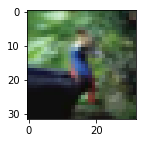

In [12]:
# Checking how different images were classified with algorithm
# Setting index to check from test dataset
index = 10

# Plotting this image, but firstly reshaping it in form of (32, 32, 3)
%matplotlib inline
plt.rcParams['figure.figsize'] = (2, 2) # Setting default size of plots
plt.imshow(x_test_flatten[:, index].reshape((32, 32, 3)))

# Showing label
print('true label y = ' + str(int(y_test_columns[0, index])))
print('predicted label y = ' + str(int(d['y_prediction_test'][0, index])))

### Plotting Cost Function history while it has been training

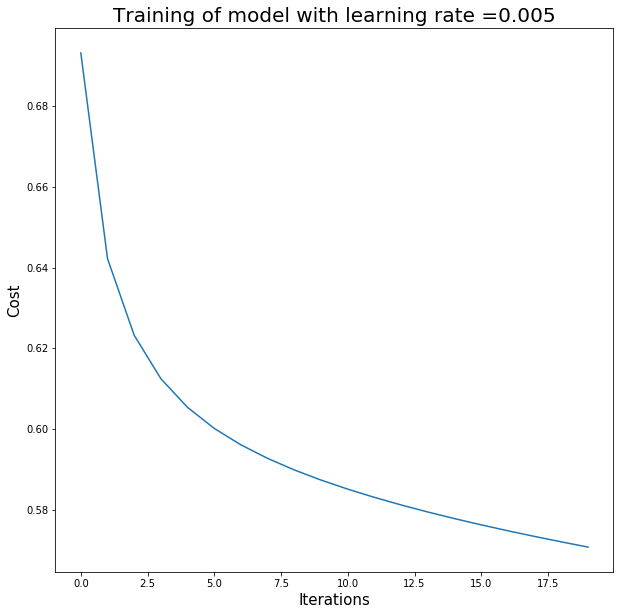

In [13]:
# Plotting history of calculated costs
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10) # Setting default size of plots

# Retrieving costs from history and deleting one dimension from it
cost_history = np.squeeze(d['cost_history'])

# Plotting
plt.plot(cost_history)
plt.ylabel('Cost', fontsize=15)
plt.xlabel('Iterations', fontsize=15)
plt.title('Training of model with learning rate =' + str(d['learning_rate']), fontsize=20)
plt.show()

# Analysis
### Testing different learning rates

learning_rate = 0.01
train accuracy: 72.36842105263158
test accuracy: 62.19512195121951

learning_rate = 0.001
train accuracy: 68.0
test accuracy: 60.97560975609756

learning_rate = 0.0001
train accuracy: 63.15789473684211
test accuracy: 53.04878048780488



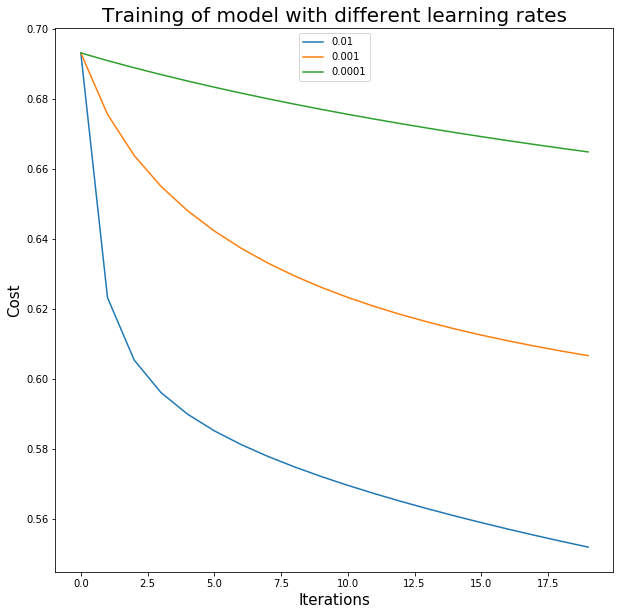

In [15]:
# It is very important to remember that learning rate determines how rapidly we will update parameters.
# And if learning rate is too large we might overshoot optimal value.
# Also, if learning rate is too small we might need too many iterations to converge to the best values.

# Creating list with different learning rates
learning_rates = [0.01, 0.001, 0.0001]

# Defining dictionary for models
models = {}

# Going through different learning rates
for i in learning_rates:
    print('learning_rate = ' + str(i))
    models[str(i)] = model(x_train_processed, y_train_columns, x_test_processed, y_test_columns, number_of_iterations = 2000, learning_rate = i, print_cost = False)
    print()
    
# Plotting history of calculated costs for every model
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10) # Setting default size of plots

# Retrieving costs from history and deleting one dimension from it
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['cost_history']), label=str(models[str(i)]['learning_rate']))

plt.ylabel('Cost', fontsize=15)
plt.xlabel('Iterations', fontsize=15)
plt.title('Training of model with different learning rates', fontsize=20)
plt.legend(loc='upper center')
plt.show()


### Testing our own image

(270, 480, 3)


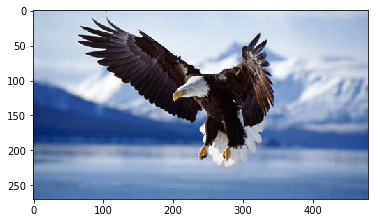

(32, 32, 3)


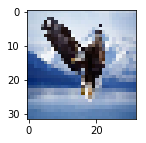

(3072, 1)

y = 1


In [37]:
# Loading image
loaded_image = Image.open('images/eagle.jpeg')

# Converting image into numpy array
array_of_image = np.array(loaded_image)
print(array_of_image.shape)  # (270, 480, 3)

# Plotting loaded image
%matplotlib inline
fig_1 = plt.figure()
plt.rcParams['figure.figsize'] = (2, 2) # Setting default size of plots
plt.imshow(array_of_image)
plt.show()

# Resizing image
array_of_image = resize(array_of_image, (32, 32), mode='reflect')
print(array_of_image.shape)  # (32, 32, 3)

# Plotting resized image
fig_2 = plt.figure()
plt.imshow(array_of_image)
plt.show()

# Reshaping resized image and transposing it to make column from it with dimension (3072, 1)
array_of_image = array_of_image.reshape((1, 32*32*3)).T
print(array_of_image.shape)  # (3072, 1)
print()

# Implementing forward pass for image
p = predict(d['w'], d['b'], array_of_image)

# Showing result
# Deleting one dimension from p by np.squeeze
print('y = ' + str(int(np.squeeze(p))))